In [1]:
import cosima_cookbook as cc
from dask.distributed import Client
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np
import xarray as xr
import cmocean as cm
import cartopy.crs as ccrs
import cmocean as cm
import cartopy.feature as cft

In [2]:
db='/g/data/x77/amh157/PanAnt/panant.db'
session=cc.database.create_session(db)
expts = ['panant-v2','panant-hycom1','panant-v3','panant-hycom1-v2','panant-01-zstar']

In [3]:
client = Client()
client

Client Scheduler: tcp://127.0.0.1:34021 Dashboard: /proxy/8787/status,Cluster Workers: 4 Cores: 16 Memory: 48.23 GB


In [4]:
depth = cc.querying.getvar('panant-v2','deptho',session,n=1)
land_mask = np.squeeze(depth.values)*0
land_mask[np.isnan(land_mask)] = 1
land_mask = np.where(land_mask==1,land_mask,np.nan)

### SST

In [9]:
tos = cc.querying.getvar('panant-v2','tos', session,chunks={'xh':120,'yh':120})

In [10]:
tos 

,Array,Chunk
Bytes,142.12 GB,1.79 MB
Shape,"(2920, 1690, 7200)","(31, 120, 120)"
Count,172896 Tasks,86400 Chunks
Type,float32,numpy.ndarray


In [11]:
tos = tos.isel(time=slice(2555,2920))

In [12]:
tos_mean = tos.mean('time').load()

In [ ]:
  # Extract a year range string and print (for title string):
t0 = tos.time.item(0).strftime("%Y-%m-%d"),
t1 = tos.time.item(-1).strftime("%Y-%m-%d"),

print([t0,t1])

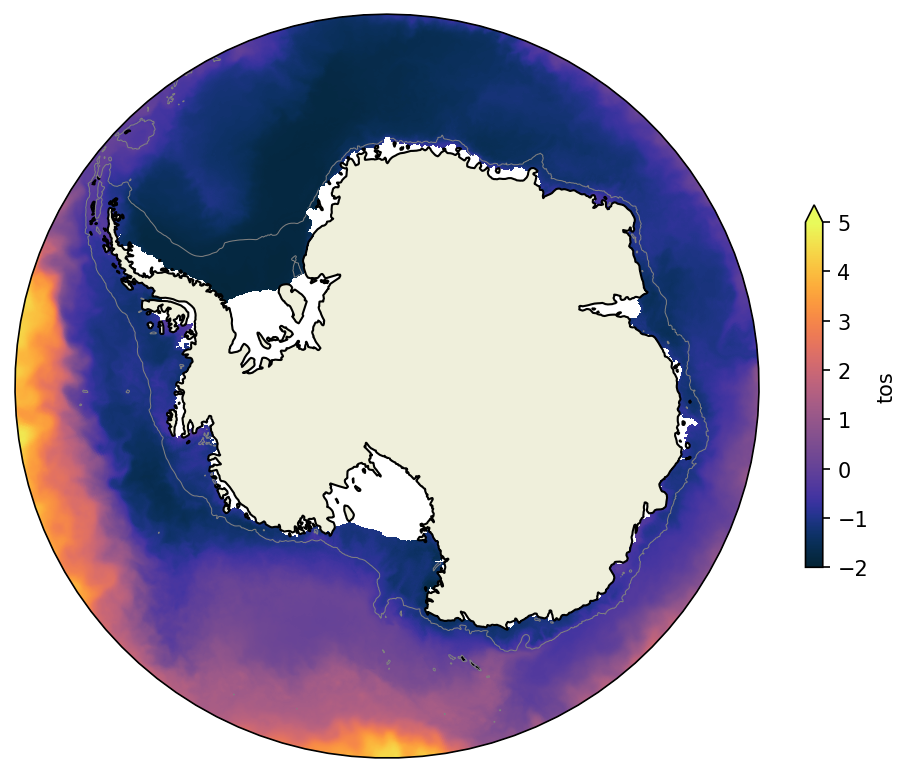

In [13]:
projection=ccrs.SouthPolarStereo()
fig = plt.figure(figsize=(8, 8), dpi=150)
ax = plt.subplot(1, 1, 1, projection=projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280, 80, -82, -60], crs=ccrs.PlateCarree())

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
depth.plot.contour(ax=ax,levels=[1000],linewidths=0.5,colors='grey',transform=ccrs.PlateCarree())
tos_mean.plot(vmin=-2,vmax=5,transform=ccrs.PlateCarree(),cmap=cm.cm.thermal,cbar_kwargs={'shrink': 0.4})

### SSH

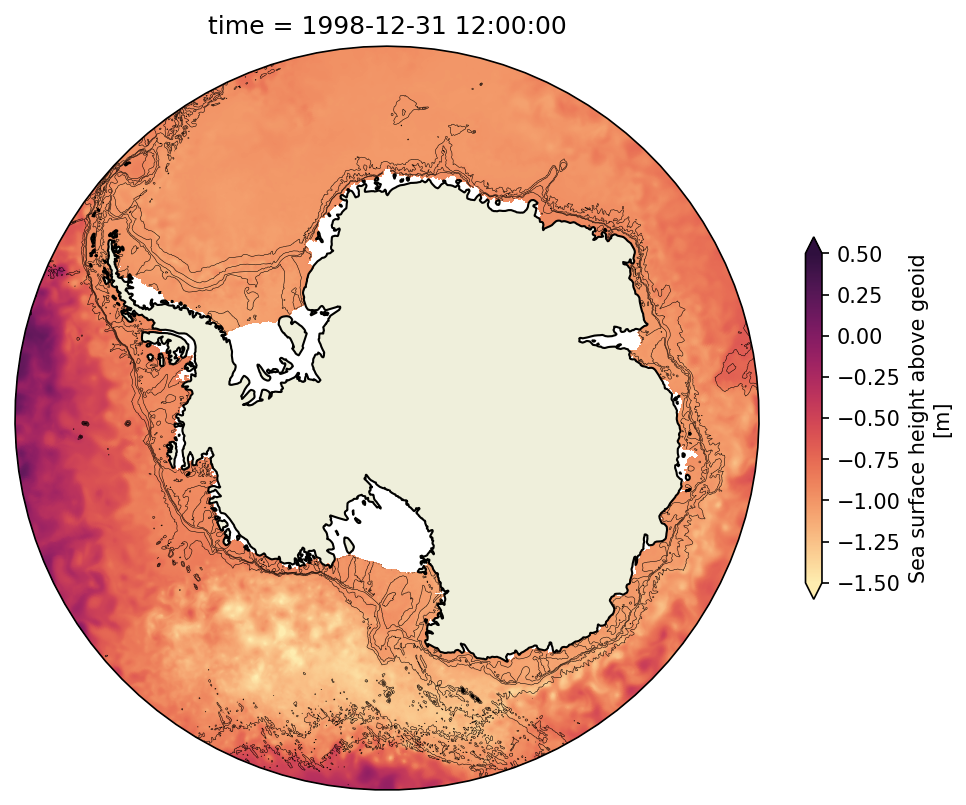

In [7]:
zos = cc.querying.getvar('panant-v2','zos', session)

projection=ccrs.SouthPolarStereo()
fig = plt.figure(figsize=(8, 8), dpi=150)
ax = plt.subplot(1, 1, 1, projection=projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280, 80, -82, -60], crs=ccrs.PlateCarree())

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
zos.isel(time=-1).plot(vmin=-1.5,vmax=0.5,transform=ccrs.PlateCarree(),cmap=cm.cm.matter,cbar_kwargs={'shrink': 0.4})

### Speed

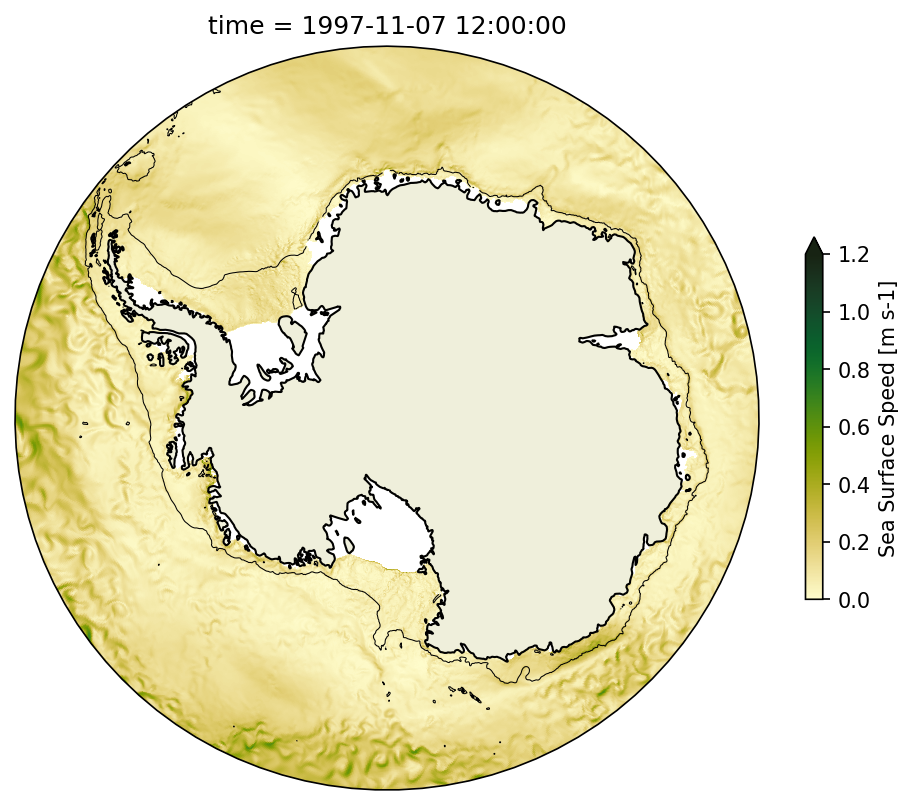

In [28]:
speed = cc.querying.getvar('panant-01-zstar','speed', session)

projection=ccrs.SouthPolarStereo()
fig = plt.figure(figsize=(8, 8), dpi=150)
ax = plt.subplot(1, 1, 1, projection=projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280, 80, -82, -60], crs=ccrs.PlateCarree())

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
depth.plot.contour(ax=ax,levels=[1000],linewidths=0.5,colors='k',transform=ccrs.PlateCarree())
speed.isel(time=2500).plot(vmin=0,vmax=1.2,transform=ccrs.PlateCarree(),cmap=cm.cm.speed,cbar_kwargs={'shrink': 0.4})

In [26]:
t0 = speed.time.item(0).strftime("%Y-%m"),
t1 = speed.time.item(-1).strftime("%Y-%m"),

print([t0,t1])

[('1991-01',), ('1997-12',)]
